<h1 style="color:purple;text-align:center">Titanic: Machine Learning from Disaster  </h1>

<h3 style="text-align:center"> Load libraries </h3>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

<h3 style=text-align:center>Load dataset</h3>

In [2]:
filename = 'train.csv'
dataset = read_csv(filename)

<h3 style="text-align:center">Analyze Data </h3>

In [3]:
# shape
print(dataset.shape)

(891, 12)


In [4]:
# types
set_option('display.max_rows', 15) # set the display number of rows 
print(dataset.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
# Peek at the first 15 rows of the data
set_option('display.width', 100)
# print(dataset.head(15))
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<i style=color:red>We can see some value are missing (NaN : Not A Number)</i>

In [6]:
# Peek at the last 15 rows of the data
dataset.tail()
# print(dataset.tail(15))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<i style=color:MediumSlateBlue>Analyzing missing values </i>

In [7]:
# Summarize all the missing values in each column
print( dataset.isnull().sum() )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<i style=color:red>There is too many missing 'Cabin' values, we cannot afford to drop rows where this value is 'NaN' <br>
And we delete the rows missing the 2 'Cabin' values
</i>

In [8]:
print("Dataset original size:", dataset.shape)
# print( dataset.dropna(subset=['Age','Embarked'], how='any').shape )
print( dataset.dropna(subset=['Embarked'], how='any').shape )

Dataset original size: (891, 12)
(889, 12)


<h3 style=text-align:center>Data Manipulation</h3>

<i style=color:MediumSlateBlue> Removing all rows where 'Embarked' is missing </i>

In [9]:
dataset.dropna(subset=['Embarked'], inplace=True) #inplace=True will change the dataset
dataset.shape

(889, 12)

<i style=color:MediumSlateBlue>Removing "Name" column</i>

In [10]:
print(dataset.drop(['Name'], axis=1).shape)
dataset.drop(['Name'], axis=1, inplace=True)

(889, 11)


<i style=color:MediumSlateBlue>Removing "Cabin", too many values are missing column</i>

In [11]:
print(dataset.drop(['Cabin'], axis=1).shape)
dataset.drop(['Cabin'], axis=1, inplace=True)

(889, 10)


<i style=color:MediumSlateBlue>Filling the missing age values with 0</i>

In [12]:
dataset['Age'].fillna(value=0, inplace=True)
dataset.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,male,27.0,0,0,211536,13.00,S
887,888,1,1,female,19.0,0,0,112053,30.00,S
888,889,0,3,female,0.0,1,2,W./C. 6607,23.45,S
889,890,1,1,male,26.0,0,0,111369,30.00,C
890,891,0,3,male,32.0,0,0,370376,7.75,Q


<i style=color:MediumSlateBlue>Modifying 'Sex' column using Male=0, Female=1 column</i>

In [13]:
dataset['Sex'] = dataset['Sex'].str.contains('female').astype(int)

In [14]:
print(dataset.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket     Fare Embarked
0            1         0       3    0  22.0      1      0         A/5 21171   7.2500        S
1            2         1       1    1  38.0      1      0          PC 17599  71.2833        C
2            3         1       3    1  26.0      0      0  STON/O2. 3101282   7.9250        S
3            4         1       1    1  35.0      1      0            113803  53.1000        S
4            5         0       3    0  35.0      0      0            373450   8.0500        S


<i style=color:MediumSlateBlue>Removing  'Ticket' column</i>

In [15]:
print(dataset.drop(['Ticket'], axis=1).shape)
dataset.drop(['Ticket'], axis=1, inplace=True)

(889, 9)


<i style=color:MediumSlateBlue>In 'Embarked' column, changing respectively 'C', 'Q', 'S' to 0,1,2  </i>

In [16]:
dataset['Embarked'] = dataset['Embarked'].str.replace('C','0')
dataset['Embarked'] = dataset['Embarked'].str.replace('Q','1')
dataset['Embarked'] = dataset['Embarked'].str.replace('S','2')

In [17]:
# Casting to float
dataset['Embarked'] = dataset['Embarked'].astype(float)

<i style=color:MediumSlateBlue>Descriptions of some columns</i>

In [18]:
# descriptions, change precision to 3 places
set_option('precision', 3)
print("Age descriptions:\n",dataset.Age.describe())
print("\nFare descriptions:\n",dataset.Fare.describe())

Age descriptions:
 count    889.000
mean      23.740
std       17.563
min        0.000
25%        6.000
50%       24.000
75%       35.000
max       80.000
Name: Age, dtype: float64

Fare descriptions:
 count    889.000
mean      32.097
std       49.698
min        0.000
25%        7.896
50%       14.454
75%       31.000
max      512.329
Name: Fare, dtype: float64


<i style=color:red>It looks like the Age and the Fare varie from a wide range. <br> 
    It could be interesting to standardize the data. </i>

In [19]:
# Class distribution
print( dataset.groupby('Survived').size() ,"\n")
print( dataset.groupby('Pclass').size(), "\n" )
print( dataset.groupby('Embarked').size() ,"\n")
print( dataset.groupby('Parch').size() ,"\n")
print(dataset.groupby('SibSp').size(), "\n")
print(dataset.groupby('Sex').size(),"\n")

Survived
0    549
1    340
dtype: int64 

Pclass
1    214
2    184
3    491
dtype: int64 

Embarked
0.0    168
1.0     77
2.0    644
dtype: int64 

Parch
0    676
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64 

SibSp
0    606
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64 

Sex
0    577
1    312
dtype: int64 



<h5 style=text-align:center>Unimodal Data Visualizations</h5>

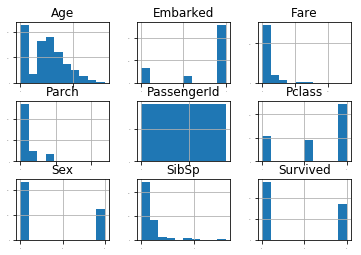

In [20]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

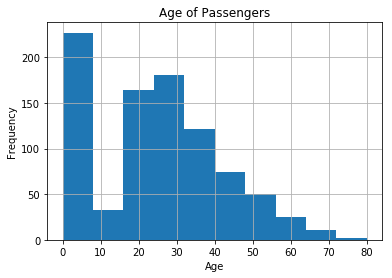

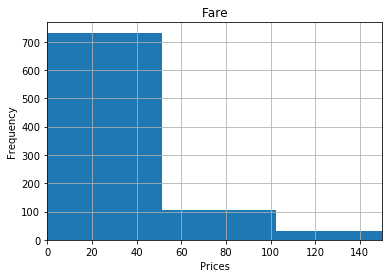

In [21]:
# histograms
fig = dataset.Age.plot(kind='hist', x="Age", title="Age of Passengers", grid=True)
fig.set_xlabel("Age")
plt.show()

# fig = dataset.Parch.plot(kind='hist', title="Number of Parents/Children", grid=True)
# fig.set_xlabel("Parents/Children")
# plt.show()

# fig = dataset.SibSp.plot(kind='hist',title="Number of siblings/spouses", grid=True)
# fig.set_xlabel("Siblings/Spouses")
# plt.show()

fig = dataset.Fare.plot(kind='hist',title="Fare", grid=True)
fig.set_xlabel("Prices")
fig.set_xlim([0,150])
plt.show()

<i style=color:red>We can see that the Age follows a Gaussian-like distributions and Parch & SibSp 
perhaps exponential--like
</i>

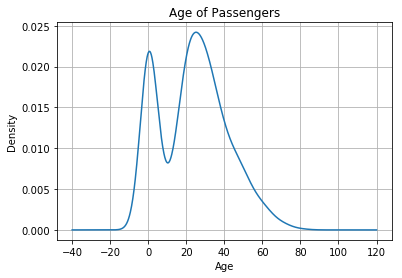

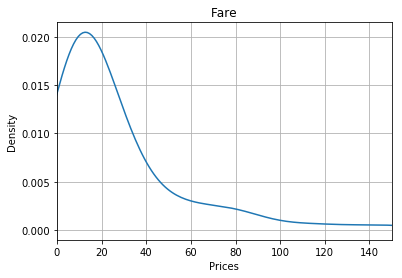

In [22]:
fig = dataset.Age.plot(kind='density', x="Age", title="Age of Passengers", grid=True)
fig.set_xlabel("Age")
plt.show()

# fig = dataset.Parch.plot(kind='density', title="Number of Parents/Children", grid=True)
# fig.set_xlabel("Parents/Children")
# plt.show()

# fig = dataset.SibSp.plot(kind='density', x="Siblings/Spouses", title="Number of siblings/spouses", grid=True)
# fig.set_xlabel("Siblings/Spouses")
# plt.show()

fig = dataset.Fare.plot(kind='density',title="Fare", grid=True)
fig.set_xlabel("Prices")
fig.set_xlim([0,150])
plt.show()

<h3 style="text-align:center">Split-out dataset </h3>

In [23]:
array = dataset.values
X_train = array[:, 2:] 
Y_train = array[:, 1].astype(float) # casting to float type to avoid error type in algorithms

print(X_train.shape, Y_train.shape)

(889, 7) (889,)


<h3 style="text-align:center">Evaluate Algorithms:Baseline </h3>

<i style=color:red>We don't know what algorithms will do well on this dataset. <br>
We design our test harness.  We will use 10-fold cross-validation. The dataset is not too small and this is a good standard test harness conguration. We will evaluate algorithms using the accuracy metric. This is a gross metric that will give a quick idea of how correct a given model is more useful on binary classification problems like this one. </i>

In [24]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

<i style="color:MediumSlateBlue;"> Let's create a baseline of performance on this problem and spot-check a number of different
algorithms
</i>

In [25]:
# Splot check algorithms
models = []
models.append( ('LR', LogisticRegression()) )
models.append( ('LDA', LinearDiscriminantAnalysis()) )
models.append( ('KNN', KNeighborsClassifier()) )
models.append( ('CART', DecisionTreeClassifier()) )
models.append( ('NB', GaussianNB()) )
models.append( ('SVM', SVC()) )

<i style="color:MediumSlateBlue;">The algorithms all use default tuning parameters. Let's compare the algorithms. We will
display the mean and standard deviation of accuracy for each algorithm as we calculate it and
collect the results for use later.</i>

In [26]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std() )
    print(msg)

LR: 0.790781 (0.038300)
LDA: 0.777285 (0.035761)
KNN: 0.695237 (0.033715)
CART: 0.787411 (0.043016)
NB: 0.782942 (0.020999)
SVM: 0.699706 (0.049263)


<i style=color:red> These are the mean accuracy results. We can look at the distribution of accuracy values calculate across 
    all cross validation folds by using box and whisker plots </i>

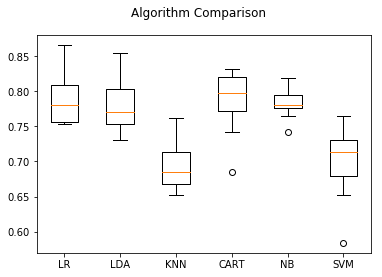

In [27]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<i style=color:red>The differing distribution of the raw data may be negatively impacting the skill of some of the algorithms.
We will evaluate the same algorithms with a standardized copy of the dataset</i>

<h3 style=text-align:center>Evaluate Algorithms: Standardize Data</h3>

<i style=color:MediumSlateBlue>We will use pipelines to standardize the data and build the model for each fold in the cross-validation test harness </i>

In [28]:
pipelines = []
pipelines.append( ('ScaledLR', Pipeline( [('Scaler', StandardScaler()), \
                                    ('LR', LogisticRegression() ) ] ) ) )
pipelines.append( ('ScaledLDA', Pipeline( [('Scaler', StandardScaler()), \
                                          ('LDA', LinearDiscriminantAnalysis())] ) ) )
pipelines.append( ('ScaledKNN', Pipeline( [('Scaler', StandardScaler()), \
                                          ('KNN', KNeighborsClassifier())] ) ) )
pipelines.append( ('ScaledCART', Pipeline( [('Scaler', StandardScaler()), \
                                          ('CART', DecisionTreeClassifier())] ) ) )
pipelines.append( ('ScaledNB', Pipeline( [('Scaler', StandardScaler()), \
                                          ('NB', GaussianNB())] ) ) )
pipelines.append( ('ScaledSVM', Pipeline( [('Scaler', StandardScaler()), \
                                          ('SVM', SVC())] ) ) )
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.782903 (0.037268)
ScaledLDA: 0.777285 (0.035761)
ScaledKNN: 0.798608 (0.035251)
ScaledCART: 0.780656 (0.041180)
ScaledNB: 0.782942 (0.020999)
ScaledSVM: 0.823404 (0.041723)


<i style=color:red>We can see that SVM comes to first this time, KNN performs better than LogisticRegression </i>

<i style=color:MediumSlateBlue>As done previously, we plot the distribution of the accuracy scores using box and whisker plots </i>

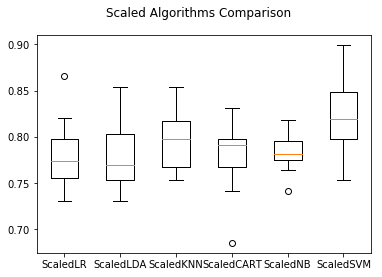

In [29]:
fig = plt.figure()
fig.suptitle('Scaled Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<i style=color:red>The results suggest it might be interesting to seek deeper into Support Vector Machine
, k-nearest neighbors and Logistic Regression algorithms </i>

<h3 style="text-align:center;">Algorithm Tuning : Tuning Support Vector Classification (SVC) </h3>

<i style=color:MediumSlateBlue>We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the
margin) and the type of kernel. <br>
We will perform a grid search using 10-fold cross-validation with a standardized copy of the training dataset 
</i>

In [30]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_) )

Best: 0.826772 using {'C': 2.0, 'kernel': 'rbf'}


<i style=color:red>The best performance use the baseline parameters.</i>

<h3 style="text-align:center;">Algorithm Tuning : Tuning Logistic Regression (LR) </h3>

<i style=color:MediumSlateBlue>For the Logistic Regression algorithm, we will tune the value of C and the solver (the algorithm to use in the optimization problem)
</i>


In [31]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
param_grid = dict(C=c_values, solver=solver_values)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(model, param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_) )

Best: 0.787402 using {'C': 0.1, 'solver': 'liblinear'}


<i style=color:red>The best performance is similar to what we had, it did not really improved</i>

<h3 style=text-align:center>Algorithm Tuning: Tuning k-nearest neighbors (KNN) </h3>

<i style=color:MediumSlateBlue>The default number of neighbors is 7. We will tune this k value from 1 to 21 </i>

In [32]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(model, param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_) )

Best: 0.809899 using {'n_neighbors': 3}


<i style=color:red>The best performance needs 11 neighbors and had improved from the baseline performance</i>

<h3 style=text-align:center>Ensemble Methods</h3>

<i style=color:MediumSlateBlue>We will evaluate ensemble machine algorithms this time. We don't need to worry about feature 
scaling as decision trees are less sensitive to data distributions</i>

In [33]:
ensembles = []
ensembles.append( ('AB', AdaBoostClassifier()) )
ensembles.append( ('GBM', GradientBoostingClassifier()) )
ensembles.append( ('RF', RandomForestClassifier()) )
ensembles.append( ('ET', ExtraTreesClassifier()) )
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.795301 (0.021563)
GBM: 0.822280 (0.034330)
RF: 0.800919 (0.038843)
ET: 0.807686 (0.032553)


<i style=color:MediumSlateBlue>We plot the distribution of scores across the cross-validation folds</i>

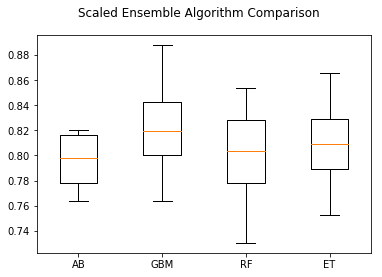

In [34]:
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<i style=color:red>We can see that Gradient Boosting might be worthy of further study with an accuracy of 82.4491%.
</i>

<h3 style=text-align:center>Tune Ensemble Method: Gradient Boosting </h3>

<i style=color:MediumSlateBlue>The default number of boosting stages to perform (n estimators) is 100.
We define a parameter grid to test n_estimator values from 50 to 400 in increments of 50
</i>    

In [35]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 240, 300, 350, 400]) )
model = GradientBoostingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(model, param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_) )

Best: 0.824522 using {'n_estimators': 200}


<i style=color:red>The best configuration was the initial n_estimators=100 </i>

<h2 style=text-align:center>Finalizing model</h2>

<h3 style=text-align:center>Loading Test Dataset</h3>

In [36]:
filename = 'test.csv'
test_dataset = read_csv(filename)

<h3 style=text-align:center>Analyze Data</h3>

<i style=color:MediumSlateBlue>Analyzing missing values </i>

In [37]:
# Summarize all the missing values in each column
print( test_dataset.isnull().sum() )

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<i style=color:red> There's one Fare missing in the 'Fare' column , we need to change its value </i>

In [38]:
# shape
test_dataset.shape

(418, 11)

In [39]:
#head
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287,NaN,S


In [40]:
#tail
test_dataset.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.358,NaN,C


<h3 style=text-align:center>Data Manipulation</h3>

<i style=color:MediumSlateBlue>Droping the Cabin, Name and Ticket columns</i>

In [41]:
test_dataset.drop(['Name'], axis=1, inplace=True)
test_dataset.drop(['Cabin'], axis=1, inplace=True)
test_dataset.drop(['Ticket'], axis=1, inplace=True)

<i style=color:MediumSlateBlue>Changing 'Sex' and 'Embarked' columns from strings to integers</i>

In [42]:
test_dataset['Sex'] = test_dataset['Sex'].str.contains('female').astype(int)

test_dataset['Embarked'] = test_dataset['Embarked'].str.replace('C','0')
test_dataset['Embarked'] = test_dataset['Embarked'].str.replace('Q','1')
test_dataset['Embarked'] = test_dataset['Embarked'].str.replace('S','2')


In [43]:
test_dataset['Embarked'] = test_dataset['Embarked'].astype(float)

In [44]:
test_dataset.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked       float64
dtype: object

<i style=color:MediumSlateBlue>Filling 'NaN' values to '0' from the 'Age' column</i>

In [45]:
test_dataset['Age'].fillna(value=0, inplace=True)

<i style=color:MediumSlateBlue>Filling 'NaN' value to '0' from the 'Fare' column</i>

In [46]:
test_dataset['Fare'].fillna(value=0, inplace=True)

In [47]:
test_dataset.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.829,1.0
1,893,3,1,47.0,1,0,7.000,2.0
2,894,2,0,62.0,0,0,9.688,1.0
3,895,3,0,27.0,0,0,8.662,2.0
4,896,3,1,22.0,1,1,12.287,2.0
5,897,3,0,14.0,0,0,9.225,2.0
6,898,3,1,30.0,0,0,7.629,1.0
7,899,2,0,26.0,1,1,29.000,2.0
8,900,3,1,18.0,0,0,7.229,0.0
9,901,3,0,21.0,2,0,24.150,2.0


<i style=color:MediumSlateBlue>Assigning X_test </i>

In [48]:
array = test_dataset.values
X_test = array[:, 1:] 

print(X_test.shape)

(418, 7)


<h3 style=text-align:center> Preparing the model </h3>

In [49]:
scaler = StandardScaler().fit(X_test)
rescaledX_test = scaler.transform(X_test)
model = SVC(C=1.0, kernel='rbf')

X_test.shape

(418, 7)

In [50]:
model.fit(rescaledX, Y_train)
print(model.predict(rescaledX_test).shape)
predictions = model.predict(rescaledX_test)

model.predict(rescaledX_test)

(418,)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

<h2 style=text-align:center> Submitting the results </h2>

In [51]:
PassengerId = array[:,0]

In [52]:
data = {'PassengerId' : PassengerId, 'Survived': predictions} 

df = pd.DataFrame(data, columns = ['PassengerId', 'Survived'])

In [53]:
df['PassengerId'] = df['PassengerId'].astype(int)
df['Survived'] = df['Survived'].astype(int)

df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
...,...,...
411,1303,1
412,1304,0


<i style=color:MediumSlateBlue>Save to output.csv file </i>

In [54]:
df.to_csv('output.csv', index=False)

In [55]:
print(df.groupby('Survived').size())

Survived
0    272
1    146
dtype: int64
